In [2]:
import numpy as np
import os

import scipy.io as sio
from scipy.optimize import linear_sum_assignment
from scipy.spatial import distance
from matplotlib import pyplot as plt

In [41]:
cwd='/Users/emilyolafson/GIT/stroke-graph-matching/data/'
unpack_precision_mats(cwd)

In [3]:
def unpack_precision_mats(cwd):
    """Turn concatenated precision FC matrix into multiple single subject/single session matrices.
    Save to /precision/ folder."""
    data_dir = str(cwd) 
    subj_all = np.genfromtxt(data_dir + 'precision/subjects.txt', dtype = 'str') #list of subjects in same order as precision matrices are saved.    
    fc_dir = data_dir + 'precision/'
    output_prec = sio.loadmat(fc_dir + 'FCprec_concat_allsub.mat')
    prec = output_prec['C'] 
    c = 0
    for sub in subj_all:
        mdic = {"C": prec[c]}
        sio.savemat(fc_dir + sub, mdic)
        c=c+1

In [15]:
# Regularization: (costmatrix - alpha*I)
subtype='stroke'

dx = 'stroke'
cwd = os.getcwd()
data_dir = '/Users/emilyolafson/GIT/stroke-graph-matching/data'
fc_dir =data_dir + '/precision'
fc=sio.loadmat(fc_dir + '/C_precision.mat')

fc=fc['C_precision']
intervals=[[0, 1], [1, 2], [2, 3], [3, 4]] #time point comparisons. 0=1, 1=2, etc.
alpha=0
session_swaps=list()
for i in range(0, 4):
    allswaps=list()
    betas=[0, 0.0001, 0.0002, 0.0003, 0.0004]
    betacounter = -1
    alphacounter = 0
    for beta in betas:
        betacounter = betacounter +1
        print('Testing beta: ' + str(beta))
        print('Testing alpha: ' + str(alpha))
        nswaps=run_graph_matching_reg(intervals[i], fc, dx, alpha, alphacounter, beta, betacounter)
        print('Mean num. swaps: ' + str(np.mean(nswaps)))
        allswaps.append(nswaps)
    betacounter = -1
    
    session_swaps.append(allswaps)

Testing beta: 0
Testing alpha: 0
test"
(23, 5)
0
Mean num. swaps: 0.22907203114860478
Testing beta: 0.0001
Testing alpha: 0
test"
(23, 5)
0
Mean num. swaps: 0.03780012978585334
Testing beta: 0.0002
Testing alpha: 0
test"
(23, 5)
0
Mean num. swaps: 0.021576898118105127
Testing beta: 0.0003
Testing alpha: 0
test"
(23, 5)
0
Mean num. swaps: 0.013951979234263464
Testing beta: 0.0004
Testing alpha: 0
test"
(23, 5)
0
Mean num. swaps: 0.011680726800778715
Testing beta: 0
Testing alpha: 0
test"
(23, 5)
0
Mean num. swaps: 0.2189620081411126
Testing beta: 0.0001
Testing alpha: 0
test"
(23, 5)
0
Mean num. swaps: 0.033412483039348705
Testing beta: 0.0002
Testing alpha: 0
test"
(23, 5)
0
Mean num. swaps: 0.016791044776119403
Testing beta: 0.0003
Testing alpha: 0
test"
(23, 5)
0
Mean num. swaps: 0.010006784260515603
Testing beta: 0.0004
Testing alpha: 0
test"
(23, 5)
0
Mean num. swaps: 0.007293080054274084
Testing beta: 0
Testing alpha: 0
test"
(23, 5)
0
Mean num. swaps: 0.224591329068941
Testing be

In [17]:
cwd='/Users/emilyolafson/GIT/stroke-graph-matching'
data_dir = str(cwd) + '/results/'
counter = 0
for i in session_swaps:
    swaps=i[:][:][:]
    meanswaps=np.mean(swaps,axis=2)
    mdic = {"meanswaps": meanswaps}
    sio.savemat(data_dir + 'stroke_meanswaps' + str(counter) + '.mat', mdic)
    counter = counter +1
    

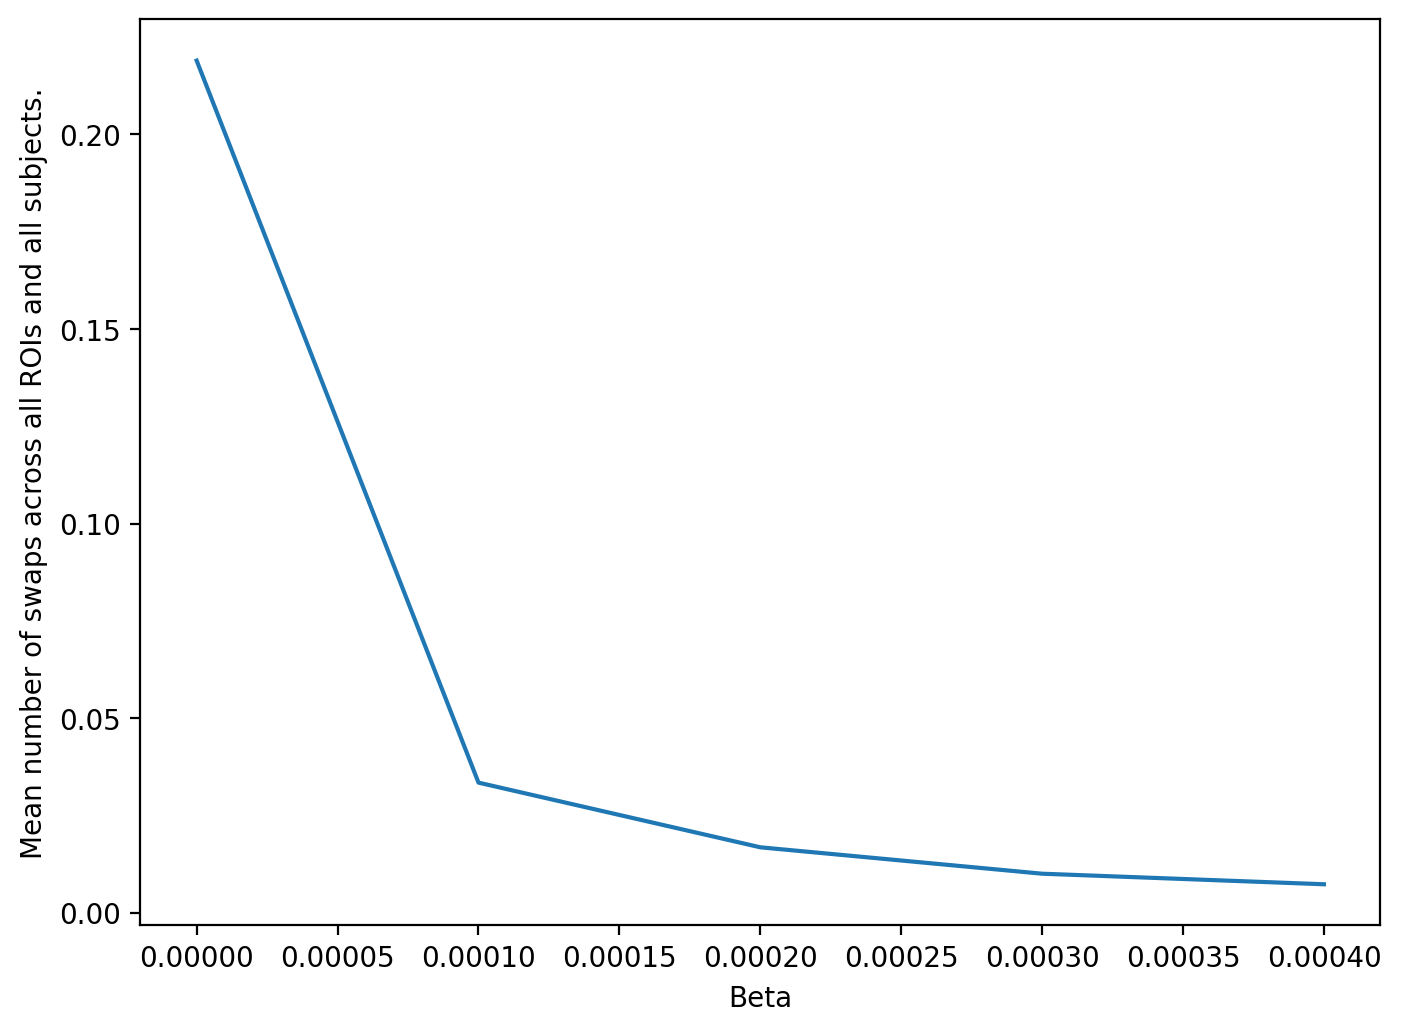

FileNotFoundError: [Errno 2] No such file or directory: '/Users/emilyolafson/GIT/stroke-graph-matching/project/results/regularized/numswaps_vs_beta0_stroke.png'

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

cwd='/Users/emilyolafson/GIT/stroke-graph-matching/'
data_dir = str(cwd) + 'project/'

results_dir = data_dir + 'results/regularized/'
betas=np.linspace(0, 0.0004, 5)
counter=0
for i in session_swaps:
    figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
    swaps=i[:][:][:]
    meanswaps=np.mean(swaps,axis=2)
    plt.plot(betas,meanswaps)
    plt.ylabel('Mean number of swaps across all ROIs and all subjects.')
    plt.xlabel('Beta')
    plt.show()
    plt.savefig(results_dir + str('numswaps_vs_beta' + str(counter) +'_stroke.png'))
    counter=counter+1

In [5]:
def remap_cost_regularized(interval, fc, alpha, beta):
    """Cost function: the cost of remapping each node in matrix A to every other node in matrix B. 
    Output is fed into graph matching algorithm. Regularization: (costmatrix - alpha*I) 
    where alpha is a regularization parameter controlling the degree to which a remapping
    to itself is preferred over remapping to any other node."""
    cwd = os.getcwd()
    data_dir = '/Users/emilyolafson/GIT/stroke-graph-matching/results'
    distances=sio.loadmat(data_dir + '/pairwise_eucl_dist_shen268.mat')

    distances=distances['eucl_dist']
    costmat_all=list()

    nROIs=fc[0][0].shape[0]
    print('test"')
    print(fc.shape)
    
    #calculate cost between all ROIs
    for i in range(0,fc.shape[0]): #subject 

        if (dx == 'stroke' and i==5 and interval == [3,4]): #sub6 has no 4,5
            continue 
        if (dx == 'stroke' and i==11 and (interval == [3,4] or interval == [2,3])): #sub12 has no 4,5 OR 3,4
            continue
        if (dx == 'stroke' and i==19 and (interval == [3,4] or interval == [2,3] or interval == [1,2])): #sub20 has no 4,5 OR 3,4 OR 2,3
            continue
            
        costmat=np.zeros((nROIs,nROIs))

        for x in range(0,nROIs): #x = time point 1.
            a=fc[i,interval[0]][x]

            for y in range(0,nROIs): #y = time point 2.
                b=fc[i,interval[1]][y]
                
                costmat[x,y]=distance.euclidean(a,b)
                
        costmat=costmat+beta*distances
        costmat_all.append(costmat)

    return [costmat_all, nROIs]

def graph_matching_regularized(costmat_all, interval, nROIs, dx, alpha, alphacounter, beta, betacounter):
    """Runs graph matching w/ the Hungarian algorithm and saves outputs:
    
        cols_SXSY.txt - each row is a different subject. Values in each column represent the node
        in the latter time point that the node in the prior time point was mapped to.
        
        roichanges_SXSY.txt - each row is a different subject. Values in each column represent 
        whether the node was remapped to a DIFFERENT node than itself in the subsequent time point 
        (elements are 0 or 1, 1 if the node was remapped to a different node and 0 if the node was mapped to itself.
        Used to calculate remap frequency for each region, when averaged vertically (across subjects)."""
    
    results_dir = '/Users/emilyolafson/GIT/stroke-graph-matching/project/results/'
    print(alphacounter)
    nROIs=fc[0][0].shape[0]
    nsubs=len(costmat_all) #test
    
    rows=np.zeros((nsubs,nROIs))
    cols=np.zeros((nsubs,nROIs))
    roichanges=np.zeros((nsubs,nROIs))
    truecols=range(0,nROIs)

    for i in range(0, nsubs):
        cost=costmat_all[i]
        rowind, colind=linear_sum_assignment(cost) #graph matching part.
        rows[i]=rowind
        cols[i]=colind

    np.savetxt(results_dir+'/precision/cols_'+ 'S'+str(interval[0]+1)+'S'+ str(interval[1]+1)+'_alpha' + str(alphacounter)+'_beta' + str(betacounter) + '.txt', cols)

    for j in range(0,nsubs):
        for i in range(0,nROIs):
            if cols[j][i]!=truecols[i]:
                roichanges[j][i]=1 #indices that are switched

    allchanges=np.mean(roichanges,0)
    np.savetxt(results_dir +'/precision/roichanges_' + 'S'+str(interval[0]+1)+'S'+ str(interval[1]+1) +'_alpha' + str(alphacounter)+'_beta' + str(betacounter) +'.txt', allchanges)
    return [allchanges]

def run_graph_matching_reg(interval, fc, dx, alpha,alphacounter, beta, betacounter):
    """Calculate the cost of remapping across all subjects, and perform graph matching.
    Saves outputs to /results/jupyter/.../stroke and /controls."""
    [costmat_all, nROIs]=remap_cost_regularized(interval, fc, alpha, beta)
    nswaps=graph_matching_regularized(costmat_all, interval, nROIs, dx, alpha,alphacounter, beta, betacounter)
    return nswaps
